<IPython.core.display.Javascript object>


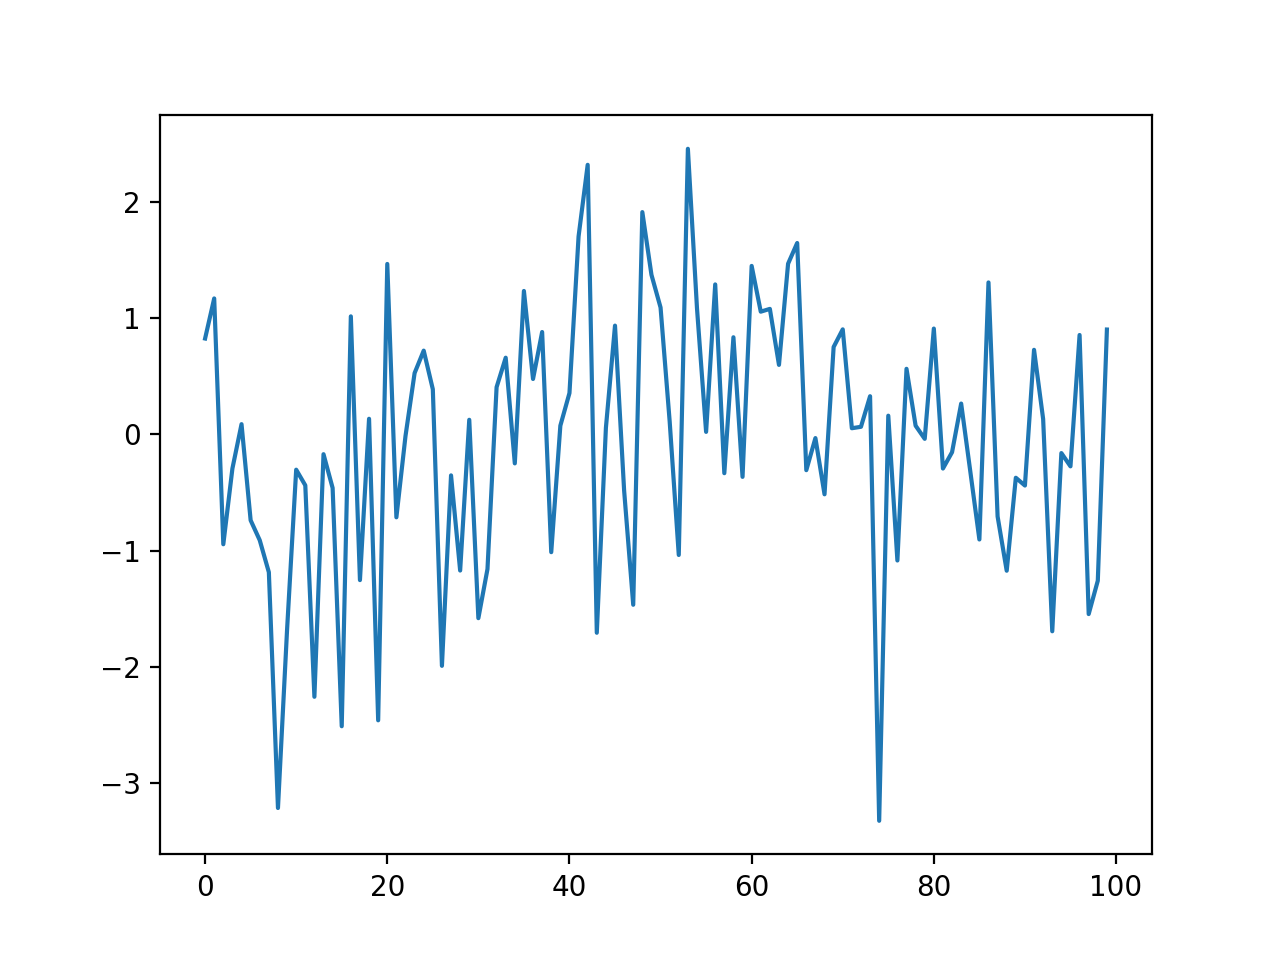

In [8]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()
    

In [1]:
randrange(1, self.size)

NameError: name 'randrange' is not defined

In [4]:
from random import randrange

print(randrange(1, 5))

2


In [49]:
from collections import defaultdict
from random import randrange
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
import re

class Graph:
    '''
    Graph class that accpets file path as an argument
    '''
    
    def __init__(self, path):
#         # Dictionary of pointers of all vertices in th graph
#         self._graph_object = {}
        # Dictionary of all vertices name
        self._graph = {}
        self._coordinates = self.read_tsp_file(path)
        self._cities = [*self._coordinates.keys()]
        self._size = len(self._cities)
        self._distances = self.compute_distances()
        

    def read_tsp_file(self, path):
        """"
        Read TSP file
        """
        city_list = []

        with open(path, 'r') as f:
            _data = re.findall(r'\n([0-9].*)', f.read())

        # Split each line by space and convert to float
        for line in _data:
            city_list.append(tuple(map(float, line.split())))
        return { int(vertex): (x,y) for vertex, x, y in city_list }
    
    def euclidean_distance(self, cityA, cityB):
        """
        Formula to calculate the Euclidean distance 
        """
        # Math library
        import math
        
        x1 = self._coordinates[cityA][0]
        y1 = self._coordinates[cityA][1]
        x2 = self._coordinates[cityB][0]
        y2 = self._coordinates[cityB][1]
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    
    def compute_distances(self):
        self.distances = defaultdict(dict)
        for cityA in self._cities:
            for cityB in self._cities:
                if cityA != cityB and cityB not in self.distances[cityA]:
                    distance = self.euclidean_distance(cityA, cityB)
                    self.distances[cityA][cityB] = distance
                    self.distances[cityB][cityA] = distance
        return self.distances
    
    
    def closest_neighbor(self, tour, node, in_tour=False, farthest=False):
        neighbors = self._distances[node]
#         print(neighbors.items())
        current_dist = [(c, d) for c, d in neighbors.items()
                        if (c in tour if in_tour else c not in tour)]
        return sorted(current_dist, key=itemgetter(1))[1]
#         return sorted(current_dist, key=itemgetter(1))[-farthest]
    
    
#     def nearest_insertion(self, farthest=False):
#         city = randrange(1, self._size)
#         tour, tours = [city], []
#         # we find the closest node R to the first node
#         neighbor, length = self.closest_neighbor(tour, city, False, farthest)
#         tour.append(neighbor)
#         tour_length = length
#         while len(tour) != len(self.cities):
#             best, dist = None, 0 if farthest else float('inf')
#             # (selection step) given a sub-tour,we find node r not in the
#             # sub-tour closest to any node j in the sub-tour,
#             # i.e. with minimal c_rj
#             for candidate in self.cities:
#                 if candidate in tour:
#                     continue
#                 # we consider only the distances to nodes already in the tour
#                 _, length = self.closest_neighbor(tour, candidate, True)
#                 if (length > dist if farthest else length < dist):
#                     best, dist = candidate, length
#             # (insertion step) we find the arc (i, j) in the sub-tour which
#             # minimizes cir + crj - cij, and we insert r between i and j
#             idx, dist = None, float('inf')
#             tour = tour + [tour[0]]
#             for i in range(len(tour) - 1):
#                 add = self.add(tour[i], tour[i + 1], best)
#                 if add < dist:
#                     idx, dist = i, add
#             tour_length += self.add(tour[idx], tour[idx + 1], best)
#             tours.append(tour)
#             tour.insert(idx + 1, best)
#             tour = tour[:-1]
#         tour_length += self.distances[tour[0]][tour[-1]]
#         best_lengths = list(map(self.compute_length, tours))
#         return [self.format_solution(step) for step in tours], best_lengths


# Instantiate graph 
graph = Graph('Random30.tsp')
print(graph._coordinates, '\n')
print(graph._cities[-2], '\n')
print(graph._distances[5], '\n')
print(graph.closest_neighbor([5], 5))


{1: (87.951292, 2.658162), 2: (33.466597, 66.682943), 3: (91.778314, 53.807184), 4: (20.526749, 47.63329), 5: (9.006012, 81.185339), 6: (20.03235, 2.761925), 7: (77.18131, 31.922361), 8: (41.059603, 32.578509), 9: (18.692587, 97.01529), 10: (51.658681, 33.808405), 11: (44.563128, 47.541734), 12: (37.80633, 50.599689), 13: (9.961241, 20.337535), 14: (28.186895, 70.415357), 15: (62.129582, 6.18305), 16: (50.376904, 42.796106), 17: (71.285134, 43.671987), 18: (34.156316, 49.113437), 19: (85.201575, 71.837519), 20: (27.466659, 1.394696), 21: (97.985778, 44.746239), 22: (40.730003, 98.40083), 23: (73.79986, 61.076693), 24: (85.076449, 17.029328), 25: (16.052736, 11.899167), 26: (20.160527, 67.23838), 27: (22.730186, 99.725333), 28: (77.19657, 88.503677), 29: (18.494217, 31.971191), 30: (72.743919, 16.071047)} 

29 

{1: 111.35023467360868, 2: 28.43659101022908, 3: 87.18266656614277, 4: 35.47488369426417, 6: 79.19477251123106, 7: 84.1113087451223, 8: 58.224192726427574, 9: 18.55847741311301,